In [44]:
import pandas as pd

In [45]:
import requests

In [46]:
from requests.auth import HTTPBasicAuth
auth = HTTPBasicAuth('elastic', 'AWbtmGda2Q7BI2bYpdjyF4qd')
url = 'https://8f9677360fc34e2eb943d737b2597c7b.us-east-1.aws.found.io:9243/brasov-dev/_search?size=10000&q=*&sort=TimeStamp:desc'


In [47]:
response = requests.get(url=url, auth=auth)

In [48]:
response

<Response [200]>

In [49]:
import json
data = json.loads(response.text)

In [50]:
data

{'took': 571,
 'timed_out': False,
 '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 10000, 'relation': 'gte'},
  'max_score': None,
  'hits': [{'_index': 'brasov-dev',
    '_type': '_doc',
    '_id': 'UkCQrH8Bwa_bL2zRJcza',
    '_score': None,
    '_source': {'Source': 'UradMonitor',
     'Sensor': 'pm10',
     'Value': 26,
     'LocationLat': 45.589267,
     'LocationLong': 25.46445,
     'TimeStamp': 1647867598000,
     'Measurement': 'µg/m3'},
    'sort': [1647867598000]},
   {'_index': 'brasov-dev',
    '_type': '_doc',
    '_id': 'kUCQrH8Bwa_bL2zRLswo',
    '_score': None,
    '_source': {'Source': 'UradMonitor',
     'Sensor': 'pm1',
     'Value': 14,
     'LocationLat': 45.589267,
     'LocationLong': 25.46445,
     'TimeStamp': 1647867598000,
     'Measurement': 'µg/m3'},
    'sort': [1647867598000]},
   {'_index': 'brasov-dev',
    '_type': '_doc',
    '_id': 'FkCQrH8Bwa_bL2zRJMwC',
    '_score': None,
    '_source': {'Source':

In [51]:
data.keys()

dict_keys(['took', 'timed_out', '_shards', 'hits'])

In [52]:
data['hits']

{'total': {'value': 10000, 'relation': 'gte'},
 'max_score': None,
 'hits': [{'_index': 'brasov-dev',
   '_type': '_doc',
   '_id': 'UkCQrH8Bwa_bL2zRJcza',
   '_score': None,
   '_source': {'Source': 'UradMonitor',
    'Sensor': 'pm10',
    'Value': 26,
    'LocationLat': 45.589267,
    'LocationLong': 25.46445,
    'TimeStamp': 1647867598000,
    'Measurement': 'µg/m3'},
   'sort': [1647867598000]},
  {'_index': 'brasov-dev',
   '_type': '_doc',
   '_id': 'kUCQrH8Bwa_bL2zRLswo',
   '_score': None,
   '_source': {'Source': 'UradMonitor',
    'Sensor': 'pm1',
    'Value': 14,
    'LocationLat': 45.589267,
    'LocationLong': 25.46445,
    'TimeStamp': 1647867598000,
    'Measurement': 'µg/m3'},
   'sort': [1647867598000]},
  {'_index': 'brasov-dev',
   '_type': '_doc',
   '_id': 'FkCQrH8Bwa_bL2zRJMwC',
   '_score': None,
   '_source': {'Source': 'UradMonitor',
    'Sensor': 'pm25',
    'Value': 22,
    'LocationLat': 45.589267,
    'LocationLong': 25.46445,
    'TimeStamp': 164786759800

In [53]:
from pandas import json_normalize
df2 = json_normalize(data['hits']['hits'])

In [54]:
df2

,_index,_type,_id,_score,sort,_source.Source,_source.Sensor,_source.Value,_source.LocationLat,_source.LocationLong,_source.TimeStamp,_source.Measurement
0,brasov-dev,_doc,UkCQrH8Bwa_bL2zRJcza,None,[1647867598000],UradMonitor,pm10,26.0,45.589267,25.464450,1647867598000,µg/m3
1,brasov-dev,_doc,kUCQrH8Bwa_bL2zRLswo,None,[1647867598000],UradMonitor,pm1,14.0,45.589267,25.464450,1647867598000,µg/m3
2,brasov-dev,_doc,FkCQrH8Bwa_bL2zRJMwC,None,[1647867598000],UradMonitor,pm25,22.0,45.589267,25.464450,1647867598000,µg/m3
3,brasov-dev,_doc,UECQrH8Bwa_bL2zRJczU,None,[1647867596000],UradMonitor,pm10,28.0,45.704032,25.640955,1647867596000,µg/m3
4,brasov-dev,_doc,lkCQrH8Bwa_bL2zRLsyJ,None,[1647867596000],UradMonitor,pm1,10.0,45.704032,25.640955,1647867596000,µg/m3
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,brasov-dev,_doc,pECtln8Bwa_bL2zRHoRs,None,[1647500361000],UradMonitor,co2,495.0,45.673977,25.606484,1647500361000,µg/m3
9996,brasov-dev,_doc,s0Ctln8Bwa_bL2zRHoSG,None,[1647500361000],UradMonitor,pm25,10.0,45.673977,25.606484,1647500361000,µg/m3
9997,brasov-dev,_doc,tUCtln8Bwa_bL2zRHoSZ,None,[1647500361000],UradMonitor,pm10,10.0,45.673977,25.606484,1647500361000,µg/m3
9998,brasov-dev,_doc,yECtln8Bwa_bL2zRIITH,None,[1647500361000],UradMonitor,pm1,7.0,45.673977,25.606484,1647500361000,µg/m3


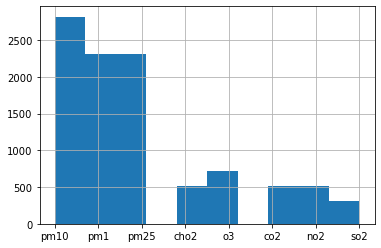

In [55]:
hist = df2.get('_source.Sensor').hist()

In [56]:
so2 = df2[df2.get('_source.Sensor') == 'so2']
so2.head(100)


,_index,_type,_id,_score,sort,_source.Source,_source.Sensor,_source.Value,_source.LocationLat,_source.LocationLong,_source.TimeStamp,_source.Measurement
83,brasov-dev,_doc,g0CQrH8Bwa_bL2zRLcw_,None,[1647864000000],Waqi,so2,2.4,45.654271,25.624061,1647864000000,µg/m3
86,brasov-dev,_doc,hkCQrH8Bwa_bL2zRLcxA,None,[1647864000000],Waqi,so2,1.7,45.716700,25.633300,1647864000000,µg/m3
93,brasov-dev,_doc,nUCQrH8Bwa_bL2zRL8wA,None,[1647864000000],Waqi,so2,2.5,45.649117,25.604136,1647864000000,µg/m3
181,brasov-dev,_doc,4kBZrH8Bwa_bL2zRPcvP,None,[1647860400000],Waqi,so2,2.6,45.654271,25.624061,1647860400000,µg/m3
185,brasov-dev,_doc,5kBZrH8Bwa_bL2zRPsu6,None,[1647860400000],Waqi,so2,2.6,45.649117,25.604136,1647860400000,µg/m3
...,...,...,...,...,...,...,...,...,...,...,...,...
3042,brasov-dev,_doc,0kDppX8Bwa_bL2zRVbbb,None,[1647752400000],Waqi,so2,1.4,45.716700,25.633300,1647752400000,µg/m3
3109,brasov-dev,_doc,DUCypX8Bwa_bL2zRWLa7,None,[1647748800000],Waqi,so2,1.7,45.649117,25.604136,1647748800000,µg/m3
3111,brasov-dev,_doc,D0CypX8Bwa_bL2zRWLa8,None,[1647748800000],Waqi,so2,2.3,45.654271,25.624061,1647748800000,µg/m3
3183,brasov-dev,_doc,X0B7pX8Bwa_bL2zRarW9,None,[1647745200000],Waqi,so2,1.8,45.654271,25.624061,1647745200000,µg/m3


In [57]:
print('Lungime dataframe: ',len(df2))
print('Lungime dataframe pm 1: ',len(so2))

Lungime dataframe:  10000
Lungime dataframe pm 1:  306


In [58]:
print(f"Number of no data values per column:\n{so2.isna().sum()}")

Number of no data values per column:
_index                    0
_type                     0
_id                       0
_score                  306
sort                      0
_source.Source            0
_source.Sensor            0
_source.Value             0
_source.LocationLat       0
_source.LocationLong      0
_source.TimeStamp         0
_source.Measurement       0
dtype: int64


In [59]:
# so2_v2 = so2.drop('_score', inplace=True, axis=1) #method 1
# so2_v2 = so2.drop('_score', axis=1) #method 2
# so2_v2 = so2.loc[:, pm1.columns != '_score'] #method3
so2_v2 = so2[[i for i in list(so2.columns) if i != '_score']] #method4
so2_v2.head(7)

,_index,_type,_id,sort,_source.Source,_source.Sensor,_source.Value,_source.LocationLat,_source.LocationLong,_source.TimeStamp,_source.Measurement
83,brasov-dev,_doc,g0CQrH8Bwa_bL2zRLcw_,[1647864000000],Waqi,so2,2.4,45.654271,25.624061,1647864000000,µg/m3
86,brasov-dev,_doc,hkCQrH8Bwa_bL2zRLcxA,[1647864000000],Waqi,so2,1.7,45.716700,25.633300,1647864000000,µg/m3
93,brasov-dev,_doc,nUCQrH8Bwa_bL2zRL8wA,[1647864000000],Waqi,so2,2.5,45.649117,25.604136,1647864000000,µg/m3
181,brasov-dev,_doc,4kBZrH8Bwa_bL2zRPcvP,[1647860400000],Waqi,so2,2.6,45.654271,25.624061,1647860400000,µg/m3
185,brasov-dev,_doc,5kBZrH8Bwa_bL2zRPsu6,[1647860400000],Waqi,so2,2.6,45.649117,25.604136,1647860400000,µg/m3
190,brasov-dev,_doc,60BZrH8Bwa_bL2zRP8vc,[1647860400000],Waqi,so2,1.8,45.716700,25.633300,1647860400000,µg/m3
274,brasov-dev,_doc,LEAirH8Bwa_bL2zRS8uP,[1647856800000],Waqi,so2,2.8,45.649117,25.604136,1647856800000,µg/m3


In [60]:
so2_v2.tail(7)

,_index,_type,_id,sort,_source.Source,_source.Sensor,_source.Value,_source.LocationLat,_source.LocationLong,_source.TimeStamp,_source.Measurement
9766,brasov-dev,_doc,AkBRl38Bwa_bL2zR8Ydh,[1647507600000],Waqi,so2,1.5,45.716700,25.633300,1647507600000,µg/m3
9852,brasov-dev,_doc,R0Abl38Bwa_bL2zRAYZc,[1647504000000],Waqi,so2,2.6,45.654271,25.624061,1647504000000,µg/m3
9858,brasov-dev,_doc,TUAbl38Bwa_bL2zRA4aM,[1647504000000],Waqi,so2,1.4,45.649117,25.604136,1647504000000,µg/m3
9862,brasov-dev,_doc,UUAbl38Bwa_bL2zRBIYd,[1647504000000],Waqi,so2,1.5,45.716700,25.633300,1647504000000,µg/m3
9947,brasov-dev,_doc,mUDkln8Bwa_bL2zRF4Xs,[1647500400000],Waqi,so2,2.7,45.654271,25.624061,1647500400000,µg/m3
9950,brasov-dev,_doc,nEDkln8Bwa_bL2zRGIVM,[1647500400000],Waqi,so2,1.4,45.649117,25.604136,1647500400000,µg/m3
9952,brasov-dev,_doc,kUDkln8Bwa_bL2zRFoUQ,[1647500400000],Waqi,so2,1.5,45.716700,25.633300,1647500400000,µg/m3


In [61]:
print('Lungime dataframe: ', len(df2))
print('Lungime dataframe pm 1: ', len(so2))
print('Lungime dataframe pm 1 - fara _score: ', len(so2_v2))

Lungime dataframe:  10000
Lungime dataframe pm 1:  306
Lungime dataframe pm 1 - fara _score:  306


In [62]:
print(f"Number of no data values per column:\n{so2_v2.isna().sum()}")

Number of no data values per column:
_index                  0
_type                   0
_id                     0
sort                    0
_source.Source          0
_source.Sensor          0
_source.Value           0
_source.LocationLat     0
_source.LocationLong    0
_source.TimeStamp       0
_source.Measurement     0
dtype: int64


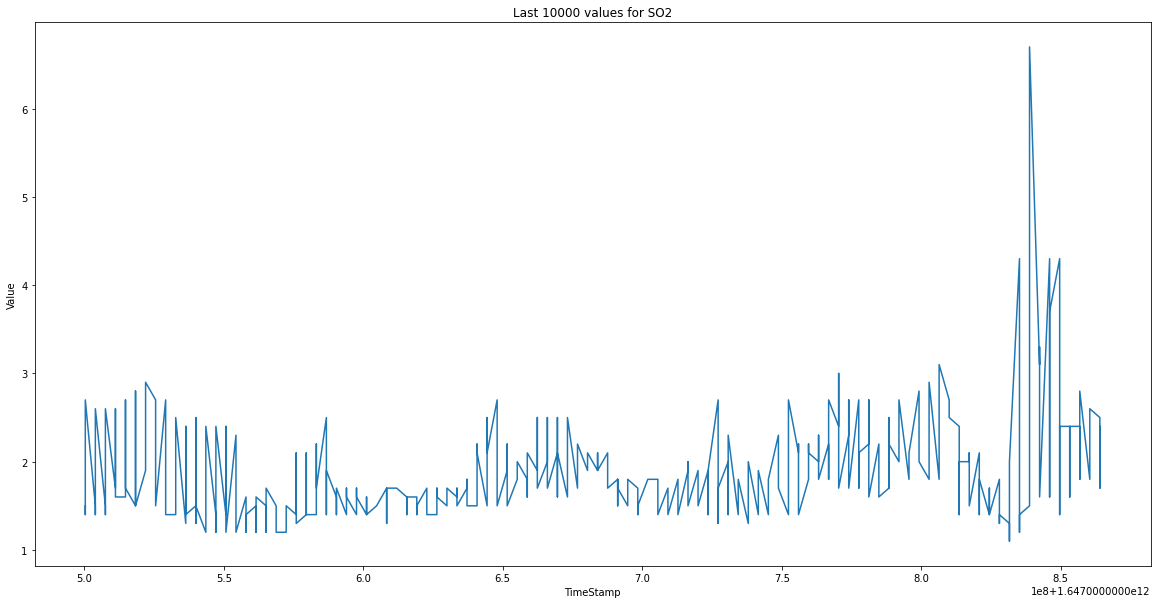

In [63]:
import matplotlib.pyplot as plt
plt.close("all")
# fig = plt.figure(figsize=(20,10), frameon=True)
plt.figure(figsize=(20,10))
plt.plot(so2_v2.get('_source.TimeStamp'), so2_v2.get('_source.Value'))
plt.xlabel("TimeStamp")
plt.ylabel("Value")
plt.title("Last 10000 values for SO2")
# plt.savefig('plots/PM1.jpg', bbox_inches = 'tight')
plt.show()

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [65]:
X = so2_v2[["_source.TimeStamp"]].values
y = so2_v2[["_source.Value"]].values

In [66]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [67]:
y_pred = regressor.predict(X)

In [68]:
print("Slope: ", float(regressor.coef_))
print("Intercept: ", float(regressor.intercept_))
# float("{:.8f}".format(float(regressor.intercept_)))

Slope:  1.6900345465003208e-09
Intercept:  -2782.7493254510696


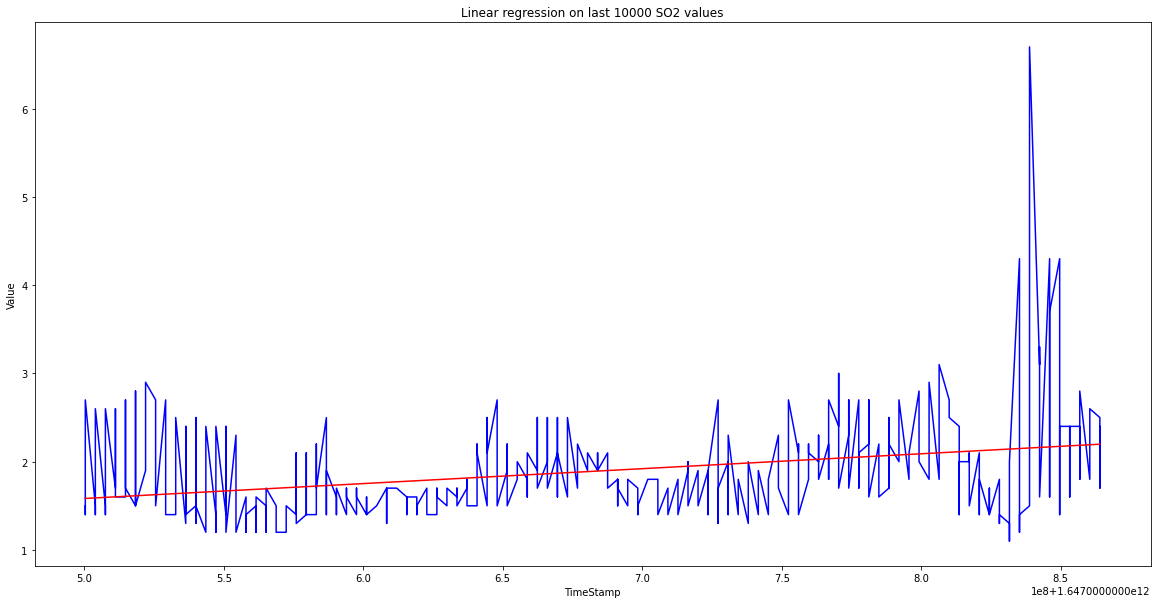

In [69]:
plt.figure(figsize=(20,10))
# plt.scatter(X, y, color = 'blue')
plt.plot(X,y, color = 'blue')
plt.plot(X, regressor.predict(X), color = 'red')
plt.title('Linear regression on last 10000 SO2 values')
plt.xlabel('TimeStamp')
plt.ylabel('Value')
plt.show()